## Task 3.1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
import seaborn as sns

In [2]:
df = pd.read_csv('../Stocks/Gold/GOLD.csv')
df.head()

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
0,"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
1,"May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
2,"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
3,"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
4,"May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318


In [3]:
df['Date'] = pd.to_datetime(df['Date'])

In [4]:
df = df.set_index('Date')
df.rename_axis(None, inplace=True)
df.head()

,Price,Open,High,Low,Vol.,Change %,Pred,new
2017-05-04,28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
2017-05-05,28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
2017-05-08,28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
2017-05-09,27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
2017-05-10,28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318


In [5]:
df.describe()

,Price,Open,High,Low,Pred,new
count,512.000000,512.000000,512.000000,512.000000,411.000000,512.000000
mean,30364.583984,30368.412109,30491.089844,30243.320312,341.712895,245.161859
std,1284.378623,1296.856656,1307.031684,1271.936410,271.075609,205.788897
min,27812.000000,27805.000000,27887.000000,27620.000000,-146.000000,11.109814
25%,29432.500000,29436.750000,29499.750000,29345.750000,156.500000,101.369172
50%,30427.500000,30399.500000,30545.000000,30286.000000,299.000000,184.537244
75%,31271.750000,31300.000000,31447.500000,31160.750000,475.000000,320.835031
max,33753.000000,34247.000000,34400.000000,33680.000000,2210.000000,1407.321485


#### We can see that Pred column has some missing values. 512 - 411 = 101 values to be precise. These are the values we have to predict.

In [6]:
df.tail(102)

,Price,Open,High,Low,Vol.,Change %,Pred,new
2018-12-10,31895,31459,31966,31420,14.09K,1.45%,521.0,990.254297
2018-12-11,31812,31850,31850,31618,10.53K,-0.26%,NaN,195.423493
2018-12-12,31626,31749,31749,31582,7.57K,-0.58%,NaN,44.232664
2018-12-13,31414,31550,31600,31337,8.43K,-0.67%,NaN,127.646233
2018-12-14,31437,31440,31514,31384,6.75K,0.07%,NaN,127.219539
...,...,...,...,...,...,...,...,...
2019-04-26,31868,31851,31934,31705,9.67K,0.08%,NaN,247.177322
2019-04-30,31625,31800,31824,31597,6.44K,-0.76%,NaN,52.201158
2019-05-01,31563,31604,31657,31503,1.55K,-0.20%,NaN,113.293305
2019-05-02,31203,31420,31425,31160,0.48K,-1.14%,NaN,48.365693


In [7]:
X = df[df['Pred'].notna()].iloc[:,:4]
y = df[df['Pred'].notna()].iloc[:,-2]

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [9]:
model = LinearRegression()
def linreg(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    rmsd = np.sqrt(mean_squared_error(y_test, y_pred))      
    r2_value = r2_score(y_test, y_pred)   
    print("Coefficients:  ", model.coef_)
    print("Intercept:  ", model.intercept_)
    print("Root Mean Square Error:  ", rmsd)
    print("R^2 Value:  ", r2_value)

In [10]:
linreg(X,y)

Coefficients:   [ 2.  3. -1. -4.]
Intercept:   2.2737367544323206e-13
Root Mean Square Error:   2.2692653779710712e-11
R^2 Value:   1.0


R^2 value of 1 signifies that Pred Column is the one which is a linear combination of the OHLC prices.

#### To predict Nan values in 'Pred' column

In [11]:
X_pred = df[df['Pred'].isna()].iloc[:,:4]

In [12]:
Y_pred = model.predict(X_pred)

In [13]:
print(Y_pred[0:10])

[ 852.  422.  530.  144.  415. 1103.  411.  613.    5.  547.]


In [14]:
df['Pred'].loc[411:] = Y_pred

In [15]:
df.tail(102)

,Price,Open,High,Low,Vol.,Change %,Pred,new
2018-12-10,31895,31459,31966,31420,14.09K,1.45%,521.0,990.254297
2018-12-11,31812,31850,31850,31618,10.53K,-0.26%,852.0,195.423493
2018-12-12,31626,31749,31749,31582,7.57K,-0.58%,422.0,44.232664
2018-12-13,31414,31550,31600,31337,8.43K,-0.67%,530.0,127.646233
2018-12-14,31437,31440,31514,31384,6.75K,0.07%,144.0,127.219539
...,...,...,...,...,...,...,...,...
2019-04-26,31868,31851,31934,31705,9.67K,0.08%,535.0,247.177322
2019-04-30,31625,31800,31824,31597,6.44K,-0.76%,438.0,52.201158
2019-05-01,31563,31604,31657,31503,1.55K,-0.20%,269.0,113.293305
2019-05-02,31203,31420,31425,31160,0.48K,-1.14%,601.0,48.365693


#### For 'new' column

In [16]:
X = df.iloc[:,:4]
y = df.iloc[:,-1]

In [17]:
linreg(X,y)

Coefficients:   [ 1.01075112 -1.00262191  1.00644876 -1.01465824]
Intercept:   1.0484172991330638
Root Mean Square Error:   0.9685873698323549
R^2 Value:   0.9999736914390309


In [18]:
from sklearn.preprocessing import PolynomialFeatures

In [19]:
polynomial_features = PolynomialFeatures(degree=2)

In [20]:
X = polynomial_features.fit_transform(X)

In [21]:
linreg(X,y)

Coefficients:   [ 0.00000000e+00  1.01036790e+00 -1.00134609e+00  1.00603658e+00
 -1.01511237e+00  5.13495121e-07 -4.69201458e-08  3.27305959e-05
 -3.40542261e-05  8.07863552e-08  2.51802791e-07 -3.24976996e-07
 -1.79380181e-07 -3.28214403e-05  3.38519376e-05]
Intercept:   0.10510429736524429
Root Mean Square Error:   0.0505982418810188
R^2 Value:   0.9999999282056374


Using Polynomial Features increases R^2 value a little bit

In [22]:
df.to_csv('Gold_complete.csv', encoding='utf-8', index=False)

## Task 3.2

In [23]:
LT_df = pd.read_csv('../Stocks/Large_Cap/LT.csv')
LT_df['Date'] = pd.to_datetime(LT_df['Date'])
LT_df.set_index('Date', inplace=True)
LT_df = LT_df[LT_df.Series == 'EQ']
LT_df.head()

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
Date,,,,,,,,,,,,,,
2017-05-15,LT,EQ,1740.60,1748.60,1751.55,1736.50,1742.00,1742.40,1743.15,797134,1.389521e+09,52614,529359,66.41
2017-05-16,LT,EQ,1742.40,1747.00,1748.25,1727.55,1740.60,1740.70,1736.62,1102926,1.915365e+09,48756,674148,61.12
2017-05-17,LT,EQ,1740.70,1743.90,1764.00,1730.50,1754.30,1755.45,1749.36,1668586,2.918955e+09,77513,830692,49.78
2017-05-18,LT,EQ,1755.45,1739.65,1750.10,1716.40,1722.10,1722.60,1725.53,1437220,2.479968e+09,47602,915874,63.73
2017-05-19,LT,EQ,1722.60,1729.00,1734.00,1697.55,1720.05,1724.55,1718.73,1512094,2.598885e+09,59280,838396,55.45


In [24]:
nifty_df = pd.read_csv('../Stocks/Nifty50/NIFTY50.csv')
nifty_df['Date'] = pd.to_datetime(nifty_df['Date'])
nifty_df.set_index('Date', inplace=True)
nifty_df.head()

,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
Date,,,,,,
2017-05-15,9433.55,9449.25,9423.10,9445.40,145163953,7790.97
2017-05-16,9461.00,9517.20,9456.35,9512.25,171709433,9209.89
2017-05-17,9517.60,9532.60,9486.10,9525.75,211856040,10726.23
2017-05-18,9453.20,9489.10,9418.10,9429.45,199340647,10782.46
2017-05-19,9469.90,9505.75,9390.75,9427.90,259861396,11544.77


In [25]:
LT_df['Day_Perc_Change'] = LT_df['Close Price'].pct_change()*100
nifty_df['Day_Perc_Change'] = nifty_df['Close'].pct_change()*100

In [26]:
daily_prices = pd.concat([ LT_df['Day_Perc_Change'][-90:], nifty_df['Day_Perc_Change'][-90:] ], axis=1)
daily_prices.columns = ['LT', 'NIFTY50']
daily_prices

,LT,NIFTY50
Date,,
2018-12-31,-0.128526,0.024402
2019-01-01,0.302598,0.437743
2019-01-02,-1.137388,-1.077900
2019-01-03,-2.139600,-1.114200
2019-01-04,-0.498208,0.516292
...,...,...
2019-05-07,1.027574,-0.865217
2019-05-08,-0.457339,-1.204133
2019-05-09,-0.286691,-0.507507


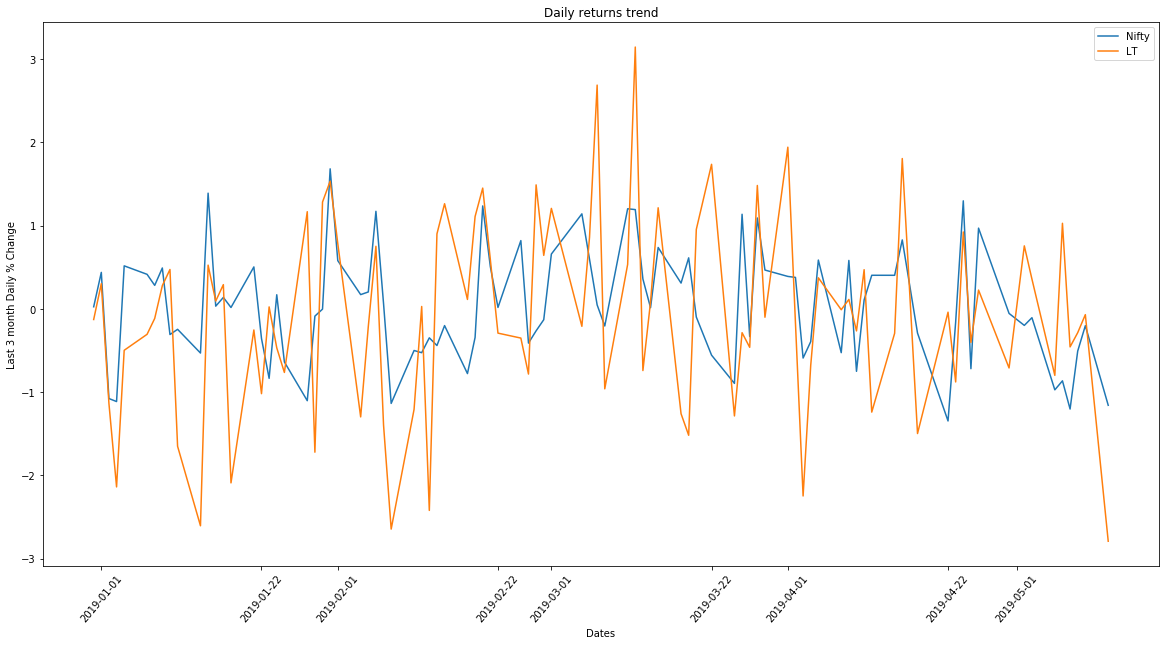

In [27]:
plt.figure(figsize=(20,10))
plt.xticks(rotation =50)
sns.lineplot(x = daily_prices.index, y = daily_prices['NIFTY50'], label ='Nifty')
sns.lineplot(x = daily_prices.index, y = daily_prices['LT'],label ='LT')
plt.gca().set(xlabel ='Dates', ylabel ='Last 3 month Daily % Change', title ='Daily returns trend');

In [28]:
def ols(X,y):
    X1 = sm.add_constant(X)
    daily_model_beta = sm.OLS(y,X1)
    results = daily_model_beta.fit()
    print(results.summary())
    ax = sns.regplot(x=X, y=y);
    

                            OLS Regression Results                            
Dep. Variable:                     LT   R-squared:                       0.179
Model:                            OLS   Adj. R-squared:                  0.169
Method:                 Least Squares   F-statistic:                     19.15
Date:                Thu, 25 Jun 2020   Prob (F-statistic):           3.31e-05
Time:                        17:05:03   Log-Likelihood:                -133.06
No. Observations:                  90   AIC:                             270.1
Df Residuals:                      88   BIC:                             275.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1141      0.113     -1.007      0.3

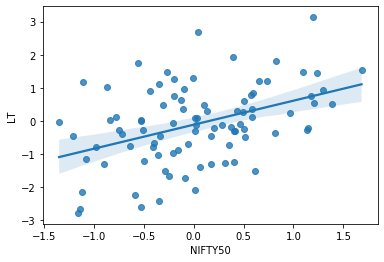

In [29]:
X = daily_prices['NIFTY50']
y = daily_prices['LT']

ols(X,y)

The value of beta for last 3 months on daily returns comes out to be 0.7252 which is less than 1, this means that the stock LT is less volatile than Nifty on a daily basis.

In [30]:
monthly_prices = pd.concat([LT_df['Close Price'],nifty_df['Close']],axis=1)
monthly_prices.columns = ['LT', 'NIFTY50']
monthly_prices.head()

,LT,NIFTY50
Date,,
2017-05-15,1742.40,9445.40
2017-05-16,1740.70,9512.25
2017-05-17,1755.45,9525.75
2017-05-18,1722.60,9429.45
2017-05-19,1724.55,9427.90


In [31]:
monthly_prices = monthly_prices.groupby([monthly_prices.index.to_period('M')]).mean()
monthly_prices.head()

,LT,NIFTY50
Date,,
2017-05,1748.457692,9498.557692
2017-06,1748.371429,9606.954762
2017-07,1380.421429,9850.119048
2017-08,1148.164286,9901.183333
2017-09,1179.380952,9977.916667


In [32]:
monthly_prices = monthly_prices.pct_change()*100
monthly_prices = monthly_prices.dropna(axis=0)
monthly_prices.head()

,LT,NIFTY50
Date,,
2017-06,-0.004934,1.141195
2017-07,-21.045299,2.531128
2017-08,-16.825090,0.518413
2017-09,2.718833,0.774992
2017-10,-1.595197,1.611166


                            OLS Regression Results                            
Dep. Variable:                     LT   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     2.681
Date:                Thu, 25 Jun 2020   Prob (F-statistic):              0.116
Time:                        17:05:04   Log-Likelihood:                -80.112
No. Observations:                  24   AIC:                             164.2
Df Residuals:                      22   BIC:                             166.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.5046      1.518     -0.991      0.3

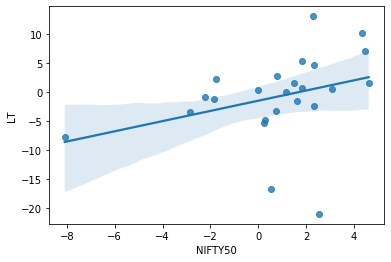

In [33]:
X = monthly_prices['NIFTY50']
y = monthly_prices['LT']

ols(X,y)

The value of beta on monthly basis comes out to be 0.8806 which is less than 1, this means that the stock LT is less volatile than Nifty on a monthly basis.

### Inferences 

#### The logic of Beta values is:
- If a stock has Beta > 1.0, it moves more than market, i.e, is more volatile.
- If Beta < 1.0, it moves less than the market, i.e, is less volatile.
- If Beta = 0.0, it indicates no correlation with the market.
- Beta < 0.0 i.e. negative. This is highly unlikely as it signifies that when market goes down the stock goes up and vice_versa.

#### From Beta Values:
- It can be seen that both Beta_daily and Beta_monthly are less than 1 i.e. they are less volatile than market.
- However, Beta_monthly is greater than Beta_daily. Hence stock is more volatile on a monthly basis than daily basis.

#### From Regression Analyis:
- Due to very small dataset the regression line is underfit which can be seen from the values of R-squared in both daily and monthly basis.
- Also from the graph you can see that there are outliers as well as the points are highly scattered.